<a href="https://colab.research.google.com/github/jpslaga/AI-Crash-Course/blob/master/keras_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports
In Python we start by importing modules. These modules have to be properly loaded on your Python processing machine. Google's colab.research.google.com website handles these dependencies for us. 

In [1]:
!pip install mnist
import pandas as pd
import numpy as np
import mnist
import keras

Using TensorFlow backend.


### Datasets
The `mnist` module downloads the 'MNIST' database. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of 600,000 handwritten digits that is commonly used for training various image processing systems, that's why it's so easy to get. 
- The images are stored as an array of grayscale values from 0-255. They are returned by `mnist.train_images()`.
- The images are labeled with integers in a list returned by `mnist.train_labels()`
- By default, there is a completely separate dataset for testing your trained machine learning tool, `mnist.test_images()` and `mnist.test_labels()`.
- There are 60,000 training images and 10,000 test images, formatted identically.

In [2]:
train_images = mnist.train_images() #len: 60000
train_labels = mnist.train_labels() #len: 60000
test_images = mnist.test_images() #len: 10000
test_labels = mnist.test_labels() #len: 10000
type(train_images)# <class 'numpy.ndarray'>

numpy.ndarray

In [3]:
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


We want to see the numbers, so we can start by pulling the 0-255 values array directly. Since `train_images` is a long list, you can select one member of it with an index, like `first_image=train_images[0]`. The array you get back is the data representation of the pixel scan of the handwritten digits. This looks visually like there is some sort of structured image here, but it's difficult to read directly. Worse, it's doing a linewrap and we don't even see it presented as pixels.

In [4]:
first_image = train_images[0]
first_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We can print wide by setting `numpy.set_printoptions()` to a wide linewidth and printing again - now it looks kind of like a 5, but backwards.

In [5]:
 np.set_printoptions(linewidth=400)
print(first_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

Since the values are labeled in the `train_labels` object, we can select from the `train_labels` object using the same index: the label for `train_images[0]` is `train_labels[0]`:

In [6]:
train_labels[0]

5

An ugly 5 that prints in numbers backwards isn't very nice, we want to print what they should look like. So I'll import `matplotlib` and use that to plot that array, assigning each pixel a grayscale color and plotting that.

In [7]:
import matplotlib.pyplot as plt

In [8]:
#https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib
def print_mnist_image(image):
    # image = np.array(image, dtype='float')
    # pixels = image.reshape((28, 28))
    pixels=image
    plt.imshow(pixels, cmap='gray_r')#cmap='gray' will read images inverted 
    plt.show()
    plt.close()

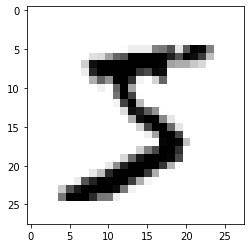

In [9]:
print_mnist_image(first_image)

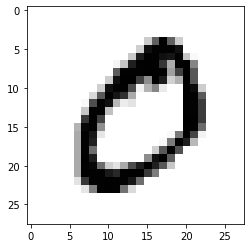

Label: 0


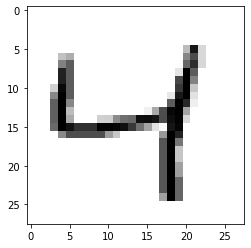

Label: 4


In [10]:
print_mnist_image(train_images[1])
print("Label:",train_labels[1])
print_mnist_image(train_images[2])
print("Label:",train_labels[2])


So you can just chain the index for both together in a loop, and run down an index. `for index in range(0,5)` gives a list of numbers from 0-4 which it can iterate down. Then we put that index into the `train_images` and the `train_labels` objects separately, and print them together in sequence.

5


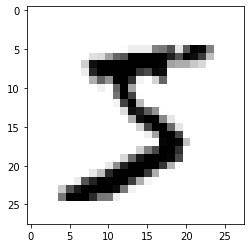

0


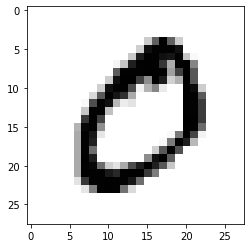

4


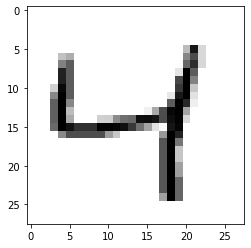

1


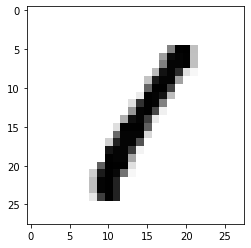

9


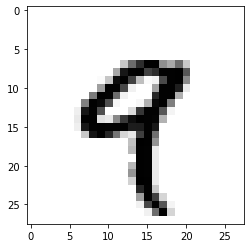

In [11]:
for index in range(0,5):
    image=train_images[index]
    label=train_labels[index]
    print(label)
    print_mnist_image(image)


### Normalize the images.
'Artificial Neural Networks seem to learn best when they have small, centered values' - Victor Zhou. So we convert the grayscale with max pixels = 255 to ratio, then subtract 0.5 to center the ratio at 0.


In [12]:
n_train_images = (train_images / 255) - 0.5
n_test_images = (test_images / 255) - 0.5

### Flatten the images.
Artificial neural networks are a flattened, 2-D model, so they require a 1-D input. Using the `.reshape()` method from earlier. This method works the same way on any numpy.ndarray object


In [13]:
f_train_images = n_train_images.reshape((-1, 784))
f_test_images = n_test_images.reshape((-1, 784))

The above didn't change the length (60000) but htey changed the shape to 784*1

In [14]:
print(f_train_images.shape) # (60000, 784)
print(f_test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


### BUILD THE MODEL 
'Every Keras model is either built using the Sequential class, which represents a linear stack of layers, or the functional Model class, which is more customizeable. We’ll be using the simpler Sequential model, since our network is indeed a linear stack of layers.' - Victor Zhou
Keras has functions to easily construct an artificial neural network:
- `from keras.models import Sequential` - the model holder. Sequential accepts a list of layers objects, like [dense_layer_1, dense_layer_2, conclusion_layer]

- `from keras.layers import Dense` - the layer object. Accepts args for number of nodes in layer, activation algorithm, and input_shape.

Keras has very well developed docstrings which are practically tutorials. You can access a module or function's docstring like `print(function.__doc__)`


In [15]:
from keras.models import Sequential #the model holder. Sequential accepts a list of layers objects, like [dense_layer_1, dense_layer_2, conclusion_layer]
from keras.layers import Dense #the layer object. Accepts args for number of nodes in layer, activation algorithm, and input_shape for 

In [16]:
print(Sequential.__doc__)

Linear stack of layers.

    # Arguments
        layers: list of layers to add to the model.
        name: Name given to the model

    # Example

    ```python
    # Optionally, the first layer can receive an `input_shape` argument:
    model = Sequential()
    model.add(Dense(32, input_shape=(500,)))

    # Afterwards, we do automatic shape inference:
    model.add(Dense(32))

    # This is identical to the following:
    model = Sequential()
    model.add(Dense(32, input_dim=500))

    # And to the following:
    model = Sequential()
    model.add(Dense(32, batch_input_shape=(None, 500)))

    # Note that you can also omit the `input_shape` argument:
    # In that case the model gets built the first time you call `fit` (or other
    # training and evaluation methods).
    model = Sequential()
    model.add(Dense(32))
    model.add(Dense(32))
    model.compile(optimizer=optimizer, loss=loss)

    # This builds the model for the first time:
    model.fit(x, y, batch_size=32, epochs=10

In [17]:
print(Dense.__doc__)

Just your regular densely-connected NN layer.

    `Dense` implements the operation:
    `output = activation(dot(input, kernel) + bias)`
    where `activation` is the element-wise activation function
    passed as the `activation` argument, `kernel` is a weights matrix
    created by the layer, and `bias` is a bias vector created by the layer
    (only applicable if `use_bias` is `True`).

    Note: if the input to the layer has a rank greater than 2, then
    it is flattened prior to the initial dot product with `kernel`.

    # Example

    ```python
        # as first layer in a sequential model:
        model = Sequential()
        model.add(Dense(32, input_shape=(16,)))
        # now the model will take as input arrays of shape (*, 16)
        # and output arrays of shape (*, 32)

        # after the first layer, you don't need to specify
        # the size of the input anymore:
        model.add(Dense(32))
    ```

    # Arguments
        units: Positive integer, dimensionality 

In [18]:
model_2_64_flattened = Sequential([
    Dense(64, activation='relu', input_shape=(784,)), #input_shape is required for input layer only
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'), #the conclusion is reached here
]) 

In [19]:
model = model_2_64_flattened

- *ReLU*: Rectified Linear Activation Unit: linear activation with slope and 0 value for negatives: f(-1)=0, f(0)=0, F(1)=1
- *Softmax*: takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval {\displaystyle (0,1)}(0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities. Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.

#COMPILE THE MODEL 
Decide 3 factors: Optimizer, Loss Function, Gradient 
- accuracy is the simplest metric, (number correctly classified) / (total classified)
- why is metrics a list? You can have multiple metrics. See this tutorial for some examples: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
- metrics also accepts other args, like 'MSE' and 'AUC'
- 'AUC' demo here: #https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
- Categorical crossentropy: https://en.wikipedia.org/wiki/Cross_entropy
- In information theory, the cross entropy between two probability distributions and over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution, rather than the true distribution.


In [20]:
print(Sequential.compile.__doc__)

Configures the model for training.

        # Arguments
            optimizer: String (name of optimizer) or optimizer instance.
                See [optimizers](/optimizers).
            loss: String (name of objective function) or objective function or
                `Loss` instance. See [losses](/losses).
                If the model has multiple outputs, you can use a different loss
                on each output by passing a dictionary or a list of losses.
                The loss value that will be minimized by the model
                will then be the sum of all individual losses.
            metrics: List of metrics to be evaluated by the model
                during training and testing. Typically you will use
                `metrics=['accuracy']`. To specify different metrics for different
                outputs of a multi-output model, you could also pass a dictionary,
                such as
                `metrics={'output_a': 'accuracy', 'output_b': ['accuracy', 'mse

In [21]:
model.compile( #run the compile() method on the 
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'], 
)

# TRAIN THE MODEL
The `train_labels` are integer values, but to use a neural network, what we really want is a set of categories for the neural network to predict - it doesn't need to understand the number value '5', it only needs to know that this is the fifth labeled category. So we convert any category set into a categorical array. the to_categorical() array output has a LENGTH equal to the number of labels, and a WIDTH equal to the number of possible values, or number of categories.

In [22]:
from keras.utils import to_categorical

In [23]:
train_labels[:5] 
type(train_labels[0]) 
from keras.utils import to_categorical
sample_categorical=to_categorical([2, 0, 1, 1, 1, 1, 0])

This is structured as a numpy n-dimensional array with 7 rows of 3 cells each.

Because they're numbers, we can't assign categories directly to this. As an aside, if we were to list incoming booking channels as a training value, we would use this code to convert:

In [24]:
channel_list=['turnkeyVR.com', 'AirBnB','VRBO','VRBO','VRBO','VRBO','AirBnB']
channel_set=list(set(channel_list))
channel_set.sort()
channel_set #it is now alphabetized in a standardized way
channel_dict={} #initialize empty dict 
channel_index=0

In [25]:
for channel in channel_set: 
    channel_dict[channel]=channel_index #channel_dict['AirBnB'=0]
    channel_index+=1

In [26]:
channel_dict #{'AirBnB': 0, 'TurnkeyVR.com': 1, 'VRBO': 2}
channel_list_numeric=[channel_dict[s] for s in channel_list]
channel_list_numeric
to_categorical(channel_list_numeric) #The resulting 
to_categorical(channel_list_numeric)==sample_categorical #True :) 

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

in our test case, we use train_labels list, which is already a set of integers from 0 to 9. Therefore: 

In [27]:
len(to_categorical(train_labels))==len(train_labels) #there is 1 row for each of the 60,000 test 
len(to_categorical(train_labels)[0])==10 #and in each row there are 10 possible values, and they are 'one hot', no partial classifications here.
len(to_categorical(train_labels)[0])==len(list(set(train_labels)))

True

Run the code to fit the model:

In [28]:
print(Sequential.fit.__doc__)

Trains the model for a fixed number of epochs (iterations on a dataset).

        # Arguments
            x: Input data. It could be:
                - A Numpy array (or array-like), or a list of arrays
                  (in case the model has multiple inputs).
                - A dict mapping input names to the corresponding
                  array/tensors, if the model has named inputs.
                - A generator or `keras.utils.Sequence` returning
                  `(inputs, targets)` or `(inputs, targets, sample weights)`.
                - None (default) if feeding from framework-native
                  tensors (e.g. TensorFlow data tensors).
            y: Target data. Like the input data `x`,
                it could be either Numpy array(s), framework-native tensor(s),
                list of Numpy arrays (if the model has multiple outputs) or
                None (default) if feeding from framework-native tensors
                (e.g. TensorFlow data tensors).
            

In [29]:
model.fit(
  x=f_train_images, #inputs to train on 
  y=to_categorical(train_labels), #correct outputs to validate accuracy by 
  epochs=5, #train for 5 rounds through the data 
  batch_size=32, #number of samples per gradient update; default is 32 
)

Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3573 - accuracy: 0.8935
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1839 - accuracy: 0.9440
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.1447 - accuracy: 0.9563
Epoch 4/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.1215 - accuracy: 0.9623
Epoch 5/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.1042 - accuracy: 0.9670


###TEST THE MODEL 
 you should have a separate set of training data that wasn't in your initial training set, this is the Validation dataset. If your neural network is complex  enough (and your number of samples is small), it's possible for it to just learn every example specifically. This is 'overfitting', and it's when your model has high accuracy in the training dataset and low accuracy in the validation dataset. 


In [30]:
model.evaluate(
  x=f_test_images,
  y=to_categorical(test_labels)
) #[0.11067571075819432, 0.9656999707221985]


10000/10000 [==============================] - 0s 27us/step


[0.10911127291172742, 0.9664999842643738]

This does not require epochs or batch size.
evaluate() returns an array containing the test loss followed by any metrics we specified. Thus, our model achieves a 0.108 test loss and 96.5% test accuracy!
This simple neural network is able to read hand-written numbers.

###USE THE MODEL 
save it. The save_weights() method accepts a path for your file save location. 

In [31]:
print(Sequential.save_weights.__doc__)
weight_path='./model.h5'
model.save_weights(weight_path) #saves it in current working directory, the file name will be model.h5
model.load_weights(weight_path) #you could start from here next time if you wanted to re-use this to read hand-written numbers later 


Dumps all layer weights to a HDF5 file.

        The weight file has:
            - `layer_names` (attribute), a list of strings
                (ordered names of model layers).
            - For every layer, a `group` named `layer.name`
                - For every such layer group, a group attribute `weight_names`,
                    a list of strings
                    (ordered names of weights tensor of the layer).
                - For every weight in the layer, a dataset
                    storing the weight value, named after the weight tensor.

        # Arguments
            filepath: String, path to the file to save the weights to.
            overwrite: Whether to silently overwrite any existing file at the
                target location, or provide the user with a manual prompt.

        # Raises
            ImportError: If h5py is not available.
        


In [32]:
predictions = model.predict(f_test_images[:5])
predictions #gives an array of probabilities for each. These are small, but the highest probability is the one with e-01. We can simplify printing them using argmax:
prediction_list=np.argmax(predictions, axis=1) # [7, 2, 1, 0, 4]

Finally, produce a nice run alongside each other, showing the digit, the expected label, and our predictions :)

Our model predicted:	 7
The data was labeled:	 7


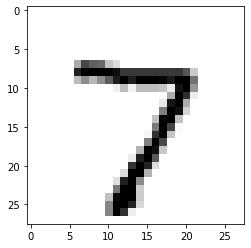

Our model predicted:	 2
The data was labeled:	 2


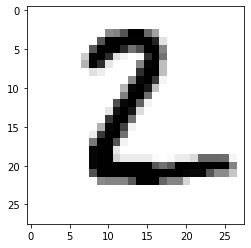

Our model predicted:	 1
The data was labeled:	 1


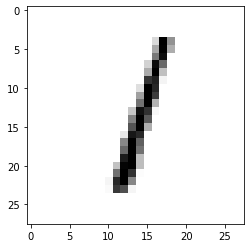

Our model predicted:	 0
The data was labeled:	 0


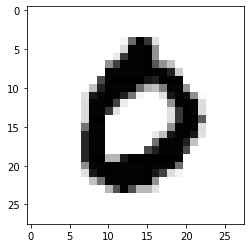

Our model predicted:	 4
The data was labeled:	 4


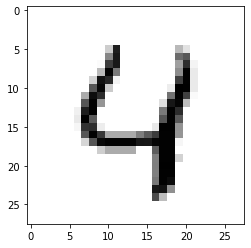

In [33]:
for index in range(0,5):
    print('Our model predicted:\t',prediction_list[index])
    print('The data was labeled:\t',test_labels[index])
    print_mnist_image(test_images[index])
